In [9]:
import utils
import settings
import importlib
import numpy as np
import features as fts
importlib.reload(fts)
import matplotlib.pyplot as plt
import seaborn; seaborn.set(palette='Set2')
plt.rcParams['figure.figsize'] = [14, 14]

In [2]:
frame = np.load(f'{settings.DATA_PATH}/audio/actors.frame.npy', allow_pickle=True)

In [14]:
formants = {}
for sample in frame:
    emo = sample['emotion']
    if emo not in formants:
        formants[emo] = []
    sig = sample['signal']
    
    wy = utils.windowed(sig)
    pwy = utils.preemp(wy)
    fx = fts.formants(pwy, sample['sample_rate'])
    formants[emo].append(fx[:8])

In [4]:
formants.keys()

dict_keys(['calm', 'angry', 'sad', 'surprised', 'neutral', 'disgust', 'fearful', 'happy'])

In [5]:
ems = ['happy', 'angry', 'calm', 'neutral', 'sad', 'fearful', 'disgust', 'surprised']

happy [ 603.66990559 1339.62004264 2117.58441068 2983.23806703 3923.81386158]
angry [ 601.76612473 1370.4259105  2265.05557622 3108.30381233 3877.0421938 ]
calm [ 486.75246394 1242.1744434  2263.71525977 3285.39960137 4376.82462673]
neutral [ 607.3889185  1161.56932675 2170.71458701 3189.10221745 4114.07761265]
sad [ 565.01703469 1354.4096712  2296.73095587 3207.22336344 4133.37771908]
fearful [ 574.19504113 1332.56874572 2168.82546475 3068.51370463 4003.58018086]
disgust [ 574.32562099 1320.46997943 2219.69255677 3089.7517967  4028.08659633]
surprised [ 599.40182665 1293.87276305 2137.4852169  2971.05335322 4005.16186569]


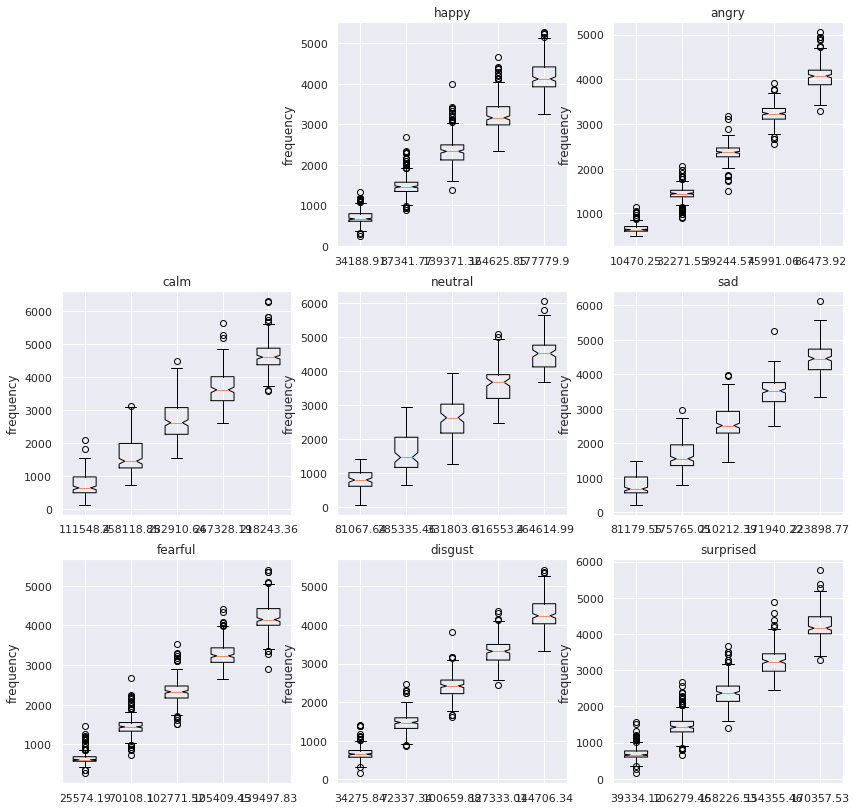

In [21]:
def plot(emotion, idx):
    plt.subplot(330 + idx)
    stack = np.vstack(formants[emotion])
    ff = stack[:, :5]
    print(emotion, np.percentile(ff, 25, axis=0))
    plt.boxplot(ff, notch=True)
    plt.title(emotion)
    plt.xticks(range(1, ff.shape[1] + 1), ff.var(axis=0).round(2))
    plt.ylabel('frequency')
#     plt.yscale('symlog')

for idx, emotion in enumerate(ems, 2):
    plot(emotion, idx)